Class Activity: Simple data mining

1) create the data frame with the data

In [1]:
import pandas as pd
data = {
    'Transaction_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-02-01', '2023-02-02', 
             '2023-03-01', '2023-03-02', '2023-03-15', '2023-03-20', '2023-04-01', 
             '2023-04-02', '2023-04-10', '2023-05-01', '2023-05-02', '2023-05-20'],
    'Product_Category': ['Electronics', 'Clothing', 'Electronics', 'Electronics', 'Clothing', 
                         'Electronics', 'Clothing', 'Electronics', 'Electronics', 'Clothing', 
                         'Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics'],
    'Region': ['North', 'South', 'East', 'North', 'West', 'North', 'South', 'North', 'East', 'South', 
               'North', 'West', 'East', 'South', 'North'],
    'Revenue ($)': [1200, 800, 1100, 1400, 750, 1300, 780, 1200, 1350, 810, 1200, 790, 1450, 820, 1500]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Transaction_ID,Date,Product_Category,Region,Revenue ($)
0,1,2023-01-01,Electronics,North,1200
1,2,2023-01-02,Clothing,South,800
2,3,2023-01-03,Electronics,East,1100
3,4,2023-02-01,Electronics,North,1400
4,5,2023-02-02,Clothing,West,750
5,6,2023-03-01,Electronics,North,1300
6,7,2023-03-02,Clothing,South,780
7,8,2023-03-15,Electronics,North,1200
8,9,2023-03-20,Electronics,East,1350
9,10,2023-04-01,Clothing,South,810


Task is to identify the patterns using visualization, clustering, or association ruliong to discover patterns. Explain the findings and use any data mining techniques do you like

2) descriptive statistics (averages, medians, max, min values)

In [2]:
# Calculate the median, average, max, and min revenue
median_revenue = df['Revenue ($)'].median()
average_revenue = df['Revenue ($)'].mean()
max_revenue = df['Revenue ($)'].max()
min_revenue = df['Revenue ($)'].min()

# Find the transaction with max and min revenue
max_transaction = df[df['Revenue ($)'] == max_revenue]
min_transaction = df[df['Revenue ($)'] == min_revenue]

# Display the results
print(f"Median Revenue: ${median_revenue}")
print(f"Average Revenue: ${average_revenue:.2f}")
print(f"Maximum Revenue: ${max_revenue} (Transaction details: {max_transaction})")
print(f"Minimum Revenue: ${min_revenue} (Transaction details: {min_transaction})")

Median Revenue: $1200.0
Average Revenue: $1096.67
Maximum Revenue: $1500 (Transaction details:     Transaction_ID        Date Product_Category Region  Revenue ($)
14              15  2023-05-20      Electronics  North         1500)
Minimum Revenue: $750 (Transaction details:    Transaction_ID        Date Product_Category Region  Revenue ($)
4               5  2023-02-02         Clothing   West          750)


3) visualization 

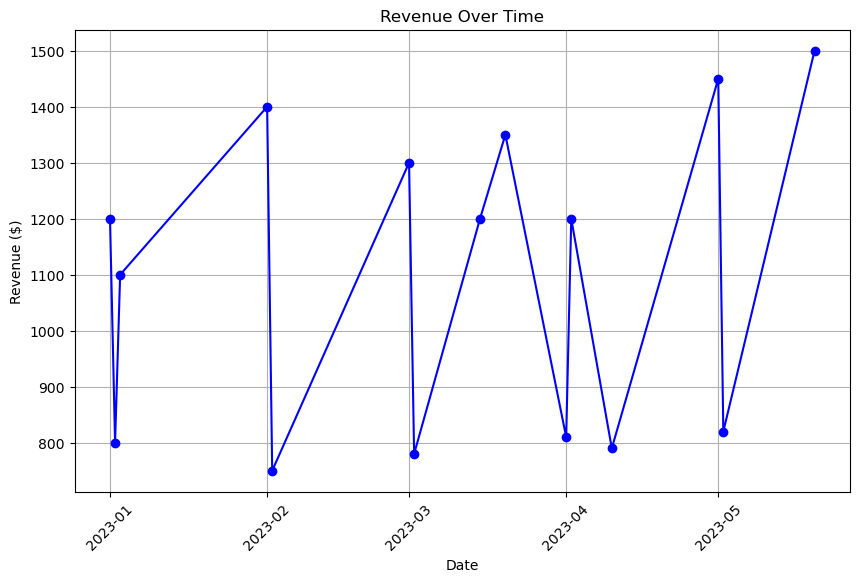

/tmp/ipykernel_409/2005494762.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Revenue ($)', data=df, estimator=sum, errorbar=None, palette='viridis')


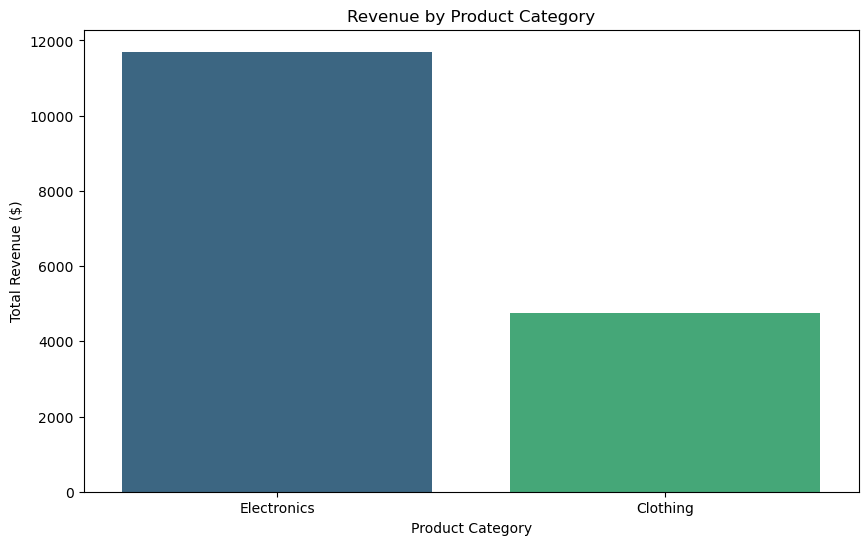

/tmp/ipykernel_409/2005494762.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Revenue ($)', data=df, estimator=sum, errorbar=None, palette='magma')


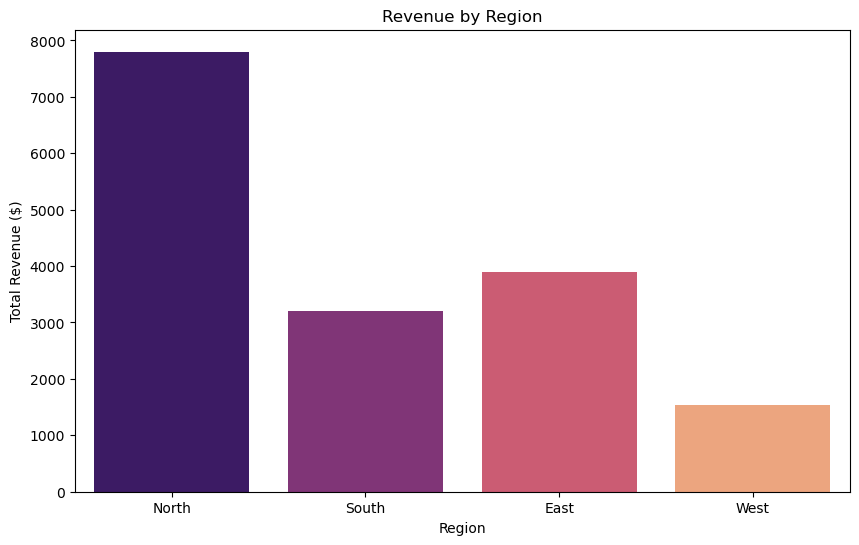

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Date column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# 1. Revenue Over Time
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Revenue ($)'], marker='o', linestyle='-', color='b')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. Revenue by Product Category (Updated)
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category', y='Revenue ($)', data=df, estimator=sum, errorbar=None, palette='viridis')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.show()

# 3. Revenue by Region (Updated)
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Revenue ($)', data=df, estimator=sum, errorbar=None, palette='magma')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue ($)')
plt.show()

Thoughts:

More money is being spent on electronics than clothing, this could be because they are generally more expensive
More moeny is being spend in the north and east regions

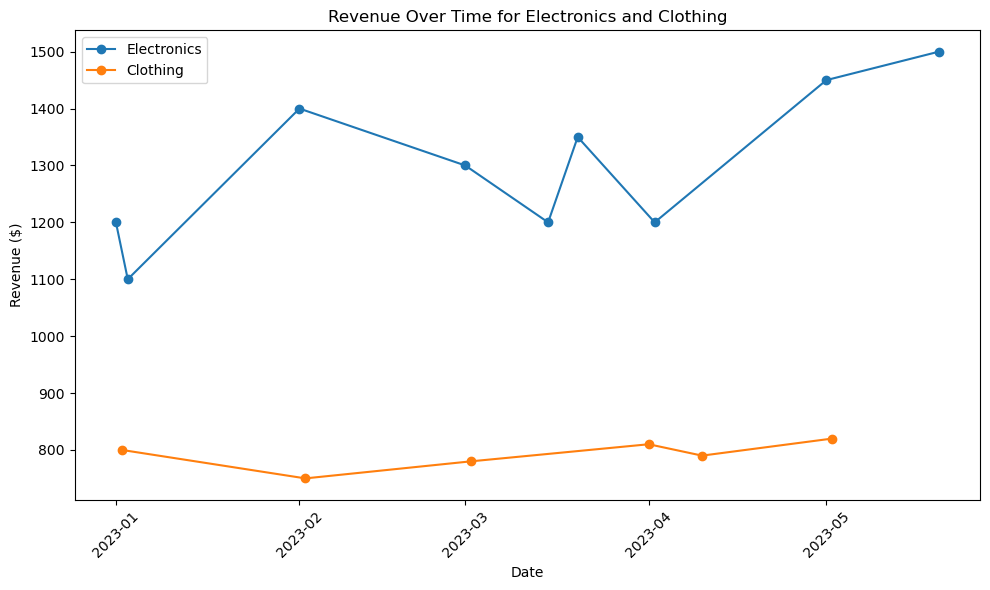

In [13]:
# Filter data for 'Electronics' and 'Clothing'
electronics_df = df[df['Product_Category'] == 'Electronics']
clothing_df = df[df['Product_Category'] == 'Clothing']

# Group by Date and sum the revenue for each category
electronics_revenue = electronics_df.groupby('Date')['Revenue ($)'].sum()
clothing_revenue = clothing_df.groupby('Date')['Revenue ($)'].sum()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot revenue over time for each category
plt.plot(electronics_revenue.index, electronics_revenue, label='Electronics', marker='o', linestyle='-')
plt.plot(clothing_revenue.index, clothing_revenue, label='Clothing', marker='o', linestyle='-')

# Adding labels and title
plt.title('Revenue Over Time for Electronics and Clothing')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Thoughts:
Eletronics ervenue is increasing greatly, with a spike in feb and march and may

clothing sales remain relatively stable buit still increase slightly.

The AMOUNT of revenue (total cost) of electronics is higherr than that of clothing, perhaps its becasue the electronics are more expensive

4) Clustering
clustering transactions into groups based on similar revenue and category/rergion combinations using kmeans.

First we preprocess our categorical features by encoding them into numberic values (one hot encoding)
Then we use clustering to group the transactions based on revenue and product region
   

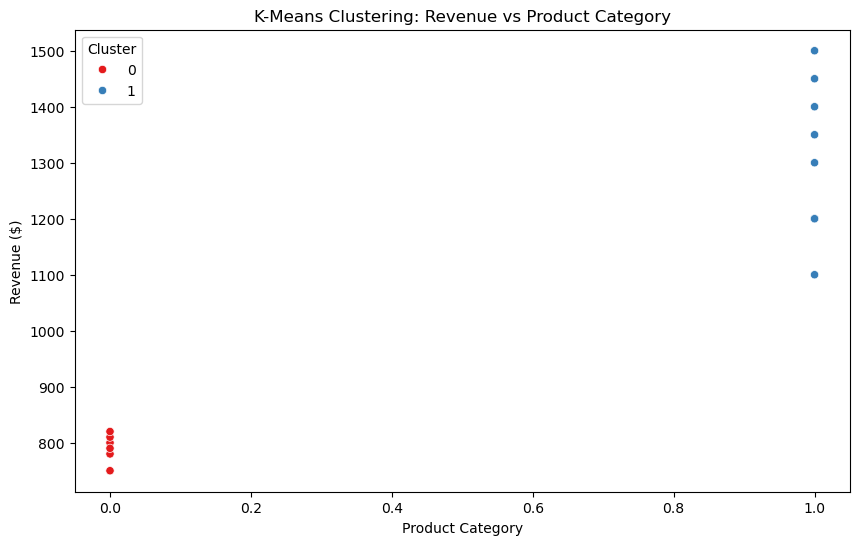

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Step 1: Preprocessing categorical variables using LabelEncoder
le_product = LabelEncoder()
le_region = LabelEncoder()

df['Product_Category_encoded'] = le_product.fit_transform(df['Product_Category'])
df['Region_encoded'] = le_region.fit_transform(df['Region'])

# Step 2: Prepare the data for clustering (we can use Revenue, Product Category, and Region for clustering)
X = df[['Revenue ($)', 'Product_Category_encoded', 'Region_encoded']]

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=10)  # Let's assume we want 2 clusters
df['Cluster'] = kmeans.fit_predict(X)

# Step 4: Visualize the clusters (Revenue vs Product Category and Region)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Product_Category_encoded', y='Revenue ($)', hue='Cluster', palette='Set1', data=df)
plt.title('K-Means Clustering: Revenue vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue ($)')
plt.show()

Seems again, that the electronics purchases are much higher than those of the clothing. 

5) association rule mining
Finding relationships between product category and region...
first we preprocess the data then we use the apriori algorithm to generate rules based on the frequency of product category region combinations


In [9]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Preprocess the data into transaction format
# create a list of transactions, where each transaction is a list of product-region pairs
transactions = df[['Product_Category', 'Region']].values.tolist()

# Step 2: Use TransactionEncoder to convert this into a format suitable for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert to a DataFrame
transaction_data = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(transaction_data, min_support=0.1, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 5: Display the association rules
print(rules)

     antecedents    consequents  antecedent support  consequent support  \
0        (South)     (Clothing)            0.266667            0.400000   
1     (Clothing)        (South)            0.400000            0.266667   
2         (West)     (Clothing)            0.133333            0.400000   
3     (Clothing)         (West)            0.400000            0.133333   
4         (East)  (Electronics)            0.200000            0.600000   
5  (Electronics)         (East)            0.600000            0.200000   
6        (North)  (Electronics)            0.400000            0.600000   
7  (Electronics)        (North)            0.600000            0.400000   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.266667    1.000000  2.500000               1.0      0.16         inf   
1  0.266667    0.666667  2.500000               1.0      0.16         2.2   
2  0.133333    1.000000  2.500000               1.0      0.08         inf   
3  0.133333    0

Interprerting the rersults

south --> clothing, if someone is form the south they are likely to buy clothing, a lift value of 2.5 means that clothing is 2.5 times more likely to appear when a transaction is from the south, confidence of 100%

clothing --> south , if someone is buying clothing they are likely from the south. confidence of 66.7% that if someone buiys clothing, they are from the south


similarly, people from the wesst are likely to buy clothing

while north and east are likely to buy electronics

## final thoughts

1. Time based pattern
   --> Electronics revenue spikes in March and May, particularly in the North region
   --> clothing sales are relatively consititent but slightly increase over time
3. Region product relationship
   --> Electronics are mostly sold in the north and east, while clothing dominates the south.
4. revenue threshold
   -->More expensive transactions (over 1200) are due to electronics, which are sold in north and east regions
